# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [187]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [188]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("Mapbox")
type(map_box_api)

str

## Load Data

In [189]:
# Read the census data into a Pandas DataFrame
file_path = Path("toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [190]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# YOUR CODE HERE!
df_dwelling=to_data.groupby(['year']).sum()
df_dwelling

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040,40583604,118563,152031
2006,266860,379400,165,69430,54690,44095,162850,1335,59368353,184352,129558
2011,274940,429220,100,72480,60355,44750,163895,2165,74259461,202750,142771
2016,269680,493270,95,71200,61565,48585,165575,2845,92969566,246584,175885


In [191]:
# Save the dataframe as a csv file
df_dwelling.to_csv('dwelling.csv', index = False)

In [192]:
# Helper create_bar_chart function
data1=df_dwelling.drop(columns=['average_house_value','shelter_costs_owned','shelter_costs_rented'])

def create_bar_chart(data1, i, color):
    """
    Create a barplot based in the data argument.
    """
    return data1.loc[i].hvplot.bar(title=' BAR CHART FOR ' + str(i) ,xlabel=str(i),ylabel='Dwelling Type units',color=color,rot=90).opts(yformatter='%.0f')
    

In [193]:
data1=df_dwelling.drop(columns=['average_house_value','shelter_costs_owned','shelter_costs_rented'])

# Create a bar chart per year to show the number of dwelling types
data1.hvplot.bar(title='Number of Dwelling Types',rot=90).opts(yformatter='%.0f')



:Bars   [year,Variable]   (value)

In [194]:
# Bar chart for 2001
# YOUR CODE HERE!
create_bar_chart(data1, 2001 ,color= 'red')


:Bars   [index]   (2001)

In [195]:
# Bar chart for 2006
# YOUR CODE HERE!
create_bar_chart(data1, 2006 ,color= 'blue')


:Bars   [index]   (2006)

In [196]:
# Bar chart for 2011
# YOUR CODE HERE!
create_bar_chart(data1, 2011 ,color= 'brown')


:Bars   [index]   (2011)

In [197]:
# Bar chart for 2016

# YOUR CODE HERE!
create_bar_chart(data1, 2001 ,color= 'purple')

:Bars   [index]   (2001)

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [198]:
# Calculate the average monthly shelter costs for owned and rented dwellings
# YOUR CODE HERE!

df_dwelling[['shelter_costs_rented','shelter_costs_owned']]

,shelter_costs_rented,shelter_costs_owned
year,,
2001,152031,118563
2006,129558,184352
2011,142771,202750
2016,175885,246584


In [199]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    fig = px.line(data, x=xlabel, y=ylabel, title=title)
    fig.update_traces(mode='markers+lines')
    fig.update_traces(line_color=color)
    fig.show()

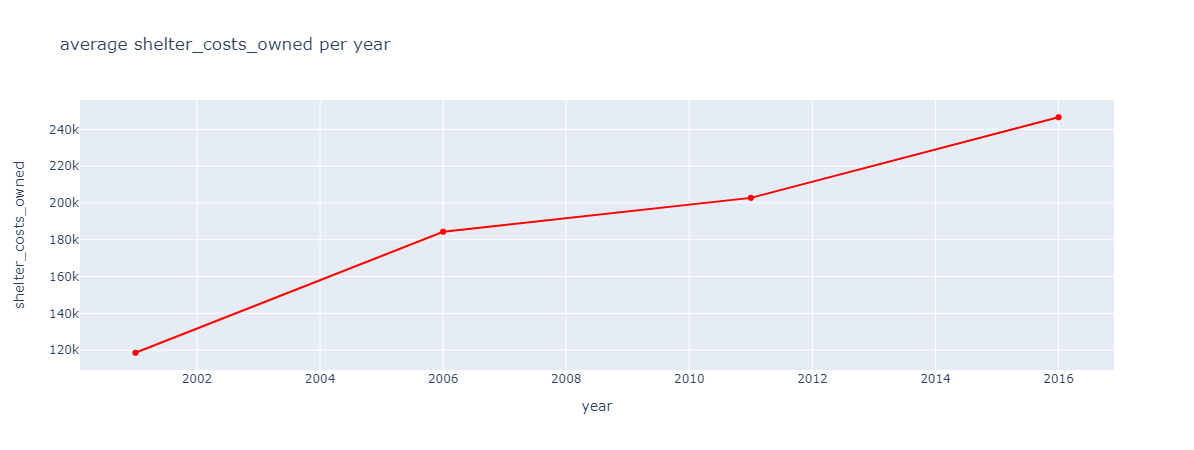

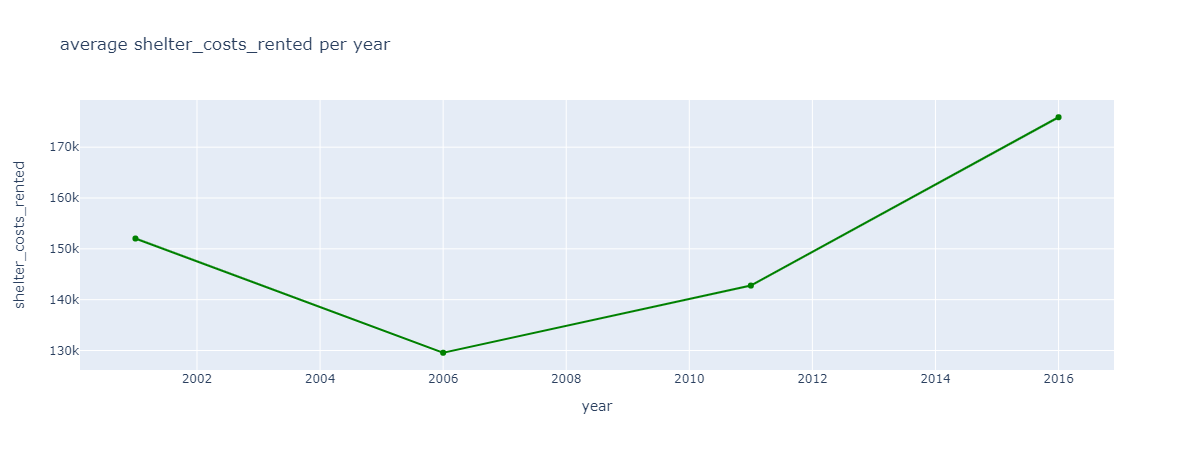

In [200]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
# YOUR CODE HERE!

create_line_chart(df_dwelling,title='average shelter_costs_owned per year', xlabel=df_dwelling.index, ylabel="shelter_costs_owned",color='red' )

# Line chart for rented dwellings
# YOUR CODE HERE!

create_line_chart(df_dwelling, title='average shelter_costs_rented per year', xlabel=df_dwelling.index, ylabel="shelter_costs_rented",color='green' )

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [201]:
# Calculate the average house value per year
# YOUR CODE HERE!
data_avg_house_value = df_dwelling.groupby('year')[['average_house_value']].mean()
data_avg_house_value

,average_house_value
year,
2001,40583604
2006,59368353
2011,74259461
2016,92969566


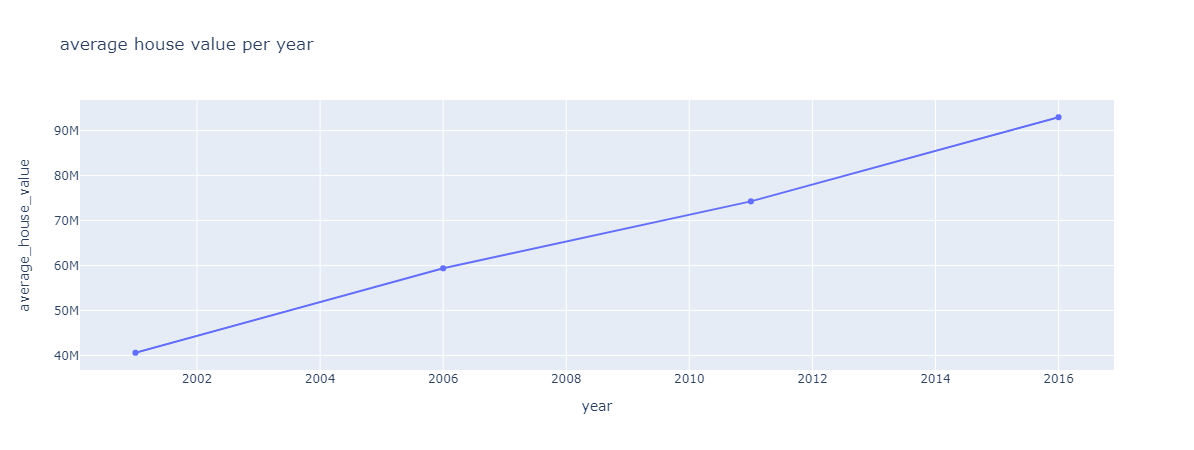

In [202]:
# Plot the average house value per year as a line chart
# YOUR CODE HERE!
fig = px.line(data_avg_house_value, x=data_avg_house_value.index, y="average_house_value", title='average house value per year')
fig.update_traces(mode='markers+lines')
fig.show()

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [203]:
# Create a new DataFrame with the mean house values by neighbourhood per year
# YOUR CODE HERE!
avg_house_val_neighbourhood =  to_data.groupby(['year','neighbourhood'])[['average_house_value']].mean()
avg_house_val_neighbourhood

average_house_value
year neighbourhood                                    
2001 Agincourt North                            200388
     Agincourt South-Malvern West               203047
     Alderwood                                  259998
     Annex                                      453850
     Banbury-Don Mills                          371864
...                                                ...
2016 Wychwood                                   787760
     Yonge-Eglinton                            1127052
     Yonge-St.Clair                            1131888
     York University Heights                    425769
     Yorkdale-Glen Park                         599698

[560 rows x 1 columns]

In [204]:
avg_house_val_neighbourhood.reset_index().hvplot(x='year', y='average_house_value', 
                         groupby='neighbourhood', widget_location='left_top',kind='scatter')

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [205]:
# Fetch the data of all dwelling types per year
# YOUR CODE HERE!
data_yr_neighbourhood = to_data.groupby(['year', 'neighbourhood']).sum()
data_yr_neighbourhood.reset_index(inplace = True)
data_yr_neighbourhood

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2,2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
3,2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,2016,Wychwood,920,1295,0,880,290,395,2080,35,787760,1864,1146
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
557,2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0,1131888,2192,1619
558,2016,York University Heights,1235,5505,0,1360,775,280,995,0,425769,1444,1122


In [206]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
# YOUR CODE HERE!
data_yr_neighbourhood.hvplot.bar(x ='year',y=['single_detached_house',
       'apartment_five_storeys_plus', 'movable_dwelling',
       'semi_detached_house', 'row_house', 'duplex',
       'apartment_five_storeys_less', 'other_house'], groupby='neighbourhood', stacked=False, colorbar= True, rot= 90)

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [207]:
# Getting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_10 =to_data.groupby('neighbourhood')[['average_house_value']].mean().sort_values('average_house_value',ascending = False)[:10]
top_10

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [208]:
# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!
top_10.hvplot.bar(x ='neighbourhood',y='average_house_value', rot= 90)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [209]:
# Load neighbourhoods coordinates data
file_path = Path("toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [210]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
df_nbd_locations = to_data.groupby('neighbourhood').mean().reset_index()
df_nbd_locations

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
136,Yonge-Eglinton,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
137,Yonge-St.Clair,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00
138,York University Heights,1355.00,5165.00,1.25,1316.25,662.50,188.75,1085.00,33.75,305899.50,1116.75,937.50


In [211]:
# Join the average values with the neighbourhood locations
# YOUR CODE HERE!
df_neighbourhood = pd.merge(df_neighbourhood_locations,df_nbd_locations, on ='neighbourhood' )
df_neighbourhood

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,43.676919,-79.425515,1056.25,1236.25,0.00,992.50,298.75,325.00,1878.75,17.50,565976.50,1390.75,1017.25
136,Yonge-Eglinton,43.704689,-79.403590,1468.75,1638.75,0.00,470.00,33.75,328.75,1385.00,6.25,809745.75,1799.50,1347.75
137,Yonge-St.Clair,43.687859,-79.397871,565.00,3948.75,0.00,425.00,212.50,172.50,1308.75,6.25,813220.25,1680.75,1369.00
138,York University Heights,43.765736,-79.488883,1355.00,5165.00,1.25,1316.25,662.50,188.75,1085.00,33.75,305899.50,1116.75,937.50


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

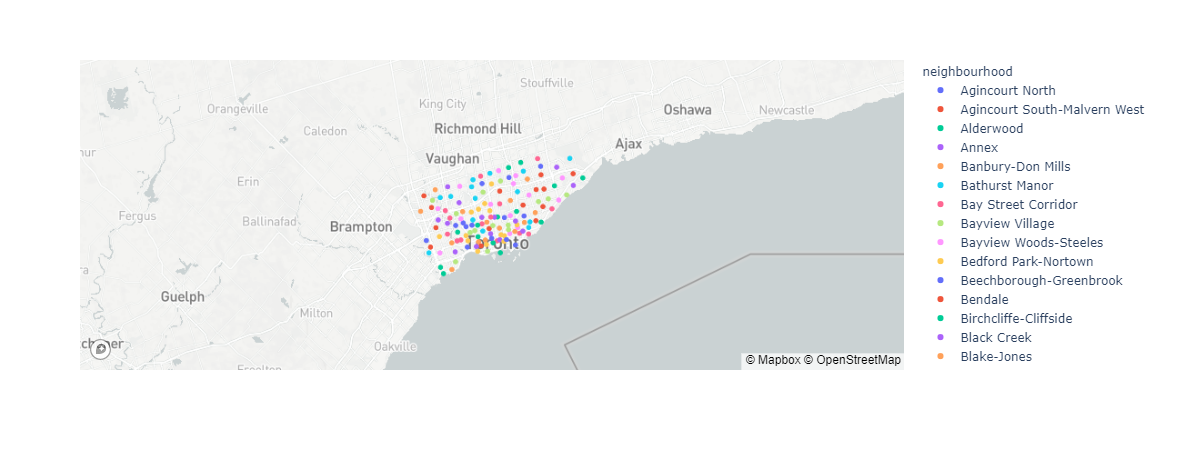

In [212]:
# Create a scatter mapbox to analyze neighbourhood info
# YOUR CODE HERE!
px.set_mapbox_access_token(map_box_api)
fig = px.scatter_mapbox(df_neighbourhood, lat="lat", lon="lon",color="neighbourhood")
fig.show()

- - -